In [591]:
from bs4 import BeautifulSoup
import urllib3
import re
import time
import numpy as np
import tqdm
from collections import defaultdict
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [592]:
urlpage_4 = 'https://www.skysports.com/premier-league-table/2023'
def get_page(urlpage_4,element,html_class):
    # avoir la page en html
    req_5 = urllib3.PoolManager()
    res_5 = req_5.request('GET', urlpage_4)
    row_html_5 = BeautifulSoup(res_5.data, 'html.parser')
    
    # Renvoie les éléments correspondant à la classe HTML dans une liste
    PL23 = row_html_5.find_all(element , 
    class_= html_class)
    return(PL23)

PL23= str(get_page(urlpage_4, 'tr', 'row-body'))


In [593]:
list_team_20 = re.findall('<span class="team-name">(.*?)</span>', str(PL23))


In [594]:
#définir une fonction pour récolté de l'information ssur les équipes
def lien_PL23 (PL23, team):
    team= team.title()
    teams = re.findall('<span class="team-name">(.*?)</span>', 
    str(PL23))
    end = PL23.index("</tr>", start)
    team_data_20 = PL23[start:end]
    match_played= 38
    data = [int(s) for s in re.findall(r'<td.*?>(\d+)</td>', team_data_20)]
    points= data[0]
    wins= data [1]
    drawns= data [2]
    loses =data [3]
    goals_for = data [4]
    goals_against = data [5]
    team_stats20 = {'match_played': match_played,
    'position': position,'points': points,
                    'wins': wins,'loses': loses ,
                    'drawns':  drawns,'goals_for': goals_for,
        'goals_against':goals_against
    }
    return team_stats20

In [595]:
#on défini un dictionnaire
team_stats_20 = {}

In [596]:
#On créer une loop pour l'ensemble des équipes
for team in list_team_20:
    # obtenir les stats des équipes
    team_stats = stat23(PL19, team)
    # on met en dataframe les stats des équipes
    team_stats_df = pd.DataFrame(team_stats, index=[0])
    # On crée des noms de variables dans la dataframe
    team_stats_df['team'] = team
    team_stats_df['year'] = 2023
    # On ajoute au dictionnaire la dataframe
    team_stats_20[team] = team_stats_df

In [597]:

# on défini une fonction pour scraper 
def scrape_PL(year):
    url = f"https://www.skysports.com/premier-league-table/{year}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve data for {year}.")
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', class_='standing-table__table')
    if table is None:
        print("Failed to find the standings table.")
        return None
    
    #On crée une boucle pour définir chaque variables dans le tableau
    standings_data = []
    for row in table.find_all('tr')[1:]:
        columns = row.find_all('td')
        team_name = columns[1].text.strip()
        matches_played = int(columns[2].text.strip())
        wins = int(columns[3].text.strip())
        draws = int(columns[4].text.strip())
        losses = int(columns[5].text.strip())
        goals_for = int(columns[6].text.strip())
        goals_against = int(columns[7].text.strip())
        goal_difference = int(columns[8].text.strip())
        points = int(columns[9].text.strip())
        
        #On nome ces variables
        standings_data.append({
            'Team': team_name,
            'Matches Played': matches_played,
            'Wins': wins,
            'Draws': draws,
            'Losses': losses,
            'Goals For': goals_for,
            'Goals Against': goals_against,
            'Goal Difference': goal_difference,
            'Points': points
        })
    
    return standings_data

#On défini une fonction qui permet aux statistiques de chaque équipe sont stockées dans un DataFrame pandas avec le nom de l'équipe et l'année comme colonnes supplémentaires, puis ajoutées au dictionnaire team_stats_20.
def stat23(standings, year):
    team_stats_20 = {}
    for team_data in standings:
        team_name = team_data['Team']
        stats = extract_team_stats_single(team_data, year)
        team_stats_df = pd.DataFrame(stats, index=[0])
        team_stats_df['team'] = team_name
        team_stats_df['year'] = year
        team_stats_20[team_name] = team_stats_df
    
    if not team_stats_20:
        print("No data extracted.")
        return None
    
    return pd.concat(team_stats_20.values(), ignore_index=True)

    #Cette fonction prend les données d'une seule équipe dans le classement et les organise dans un format de dictionnaire approprié.
def extract_team_stats_single(team_data, year):
    match_played = team_data['Matches Played']
    points = team_data['Points']
    wins = team_data['Wins']
    losses = team_data['Losses']
    draws = team_data['Draws']
    goals_for = team_data['Goals For']
    goals_against = team_data['Goals Against']
    
    team_stats = {
        'year': year,
        'team': None,  
        'match_played': match_played,
        'position': None,  
        'points': points,
        'wins': wins,
        'loses': losses,
        'drawns': draws,
        'goals_for': goals_for,
        'goals_against': goals_against
    }
    
    return team_stats

# On essaye notre fonction avec l'année que l'on souhaite
year = 2023
standings = scrape_PL(year)
if standings:
    team_stats_20 = stat23(standings, year)
    print(team_stats_20)


    year                      team  match_played position  points  wins  \
0   2023                 Liverpool            29     None      67    20   
1   2023                   Arsenal            29     None      65    20   
2   2023           Manchester City            29     None      64    19   
3   2023               Aston Villa            30     None      59    18   
4   2023         Tottenham Hotspur            30     None      57    17   
5   2023         Manchester United            29     None      48    15   
6   2023           West Ham United            31     None      45    12   
7   2023          Newcastle United            30     None      44    13   
8   2023  Brighton and Hove Albion            29     None      42    11   
9   2023   Wolverhampton Wanderers            30     None      42    12   
10  2023               Bournemouth            30     None      41    11   
11  2023                   Chelsea            28     None      40    11   
12  2023                 

In [598]:
#On défini l'url du site  où l'on trouve le budget pour chaque équipe
url_7 = "https://sportune.20minutes.fr/sport-business/football/les-budgets-des-clubs-de-la-premier-league-2023-2024-312241/2"

In [599]:

#On crée une fonction pour scraper l'url en faisant attention de se renomer
def scrape_premier_league_budgets(url):
    user_agent = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'}
    
    res = requests.get(url, headers=user_agent)
    if res.status_code != 200:
        print("Failed to retrieve data.")
        return None
    
    content = res.text
    soup = BeautifulSoup(content, "lxml")
    contents = re.findall('<tbody>.*?\n</tbody>\n</table>', str(soup), re.DOTALL)
    
    #On extrait les données que l'on veut
    all_headers = []
    for html_content in contents:
        html_soup = BeautifulSoup(html_content, 'html.parser')    
        headers = html_soup.find_all("th")    
        all_headers.extend(headers)
    
    Titles = [i.text for i in all_headers]
    df = pd.DataFrame(columns=Titles)
    
    #On ajoute les données dans la liste rows_data
    all_rows = []
    for html_content in contents:
        html_soup = BeautifulSoup(html_content, 'html.parser')
        rows = html_soup.find_all("tr")
        rows_data = []
        for row in rows:
            cells = row.find_all("td")
            cell_data = [cell.get_text(strip=True) for cell in cells]
            rows_data.append(cell_data)
        all_rows.extend(rows_data)
    
    if all_rows:
        all_rows.pop(-1)
    #On crée un dataframe pandas
    df = pd.concat([df, pd.DataFrame(all_rows, columns=Titles)], ignore_index=True)
    return df

#On excute le code on mettant l'adresse que l'on veut scraper
url = "https://sportune.20minutes.fr/sport-business/football/les-budgets-des-clubs-de-la-premier-league-2023-2024-312241/2"
budgets_df = scrape_premier_league_budgets(url)
budgets_df.rename(columns={'Club': 'team'}, inplace=True)
print(budgets_df)


                 Club  Budget
0                None    None
1     Manchester City  800 M€
2   Manchester United  720 M€
3           Liverpool  690 M€
4             Chelsea  600 M€
5           Tottenham  550 M€
6             Arsenal  525 M€
7           Newcastle  305 M€
8            West Ham  290 M€
9             Everton  230 M€
10        Aston Villa  220 M€
11           Brighton  200 M€
12     Crystal Palace  200 M€
13      Wolverhampton  185 M€
14          Brentford  175 M€
15        Bournemouth  160 M€
16             Fulham  155 M€
17   Sheffield United  145 M€
18            Burnley  125 M€
19  Nottingham Forest  120 M€
20         Luton Town   90 M€


In [600]:

# On remplace les noms d'équipes dans team_stats_20, sinon l'ensemble du merge ne donnera que les variables qui ont le même nom
team_stats_20.replace({'Tottenham Hotspur': 'Tottenham',
                       'Nottingham Forest **': 'Nottingham Forest',
                       'Everton *': 'Everton',
                       'West Ham United': 'West Ham',
                       'Wolverhampton Wanderers': 'Wolverhampton',
                       'Brighton and Hove Albion': 'Brighton',
                       'Newcastle United': 'Newcastle'}, inplace=True)








In [601]:
# Fusionner les deux DataFrames en utilisant la colonne "team" comme clé de fusion
# Importer la librairie pandas
import pandas as pd

# Supposons que df1 et df2 sont vos dataframes
# Voici un exemple de fusion en utilisant les colonnes "Club" et "Team" comme clés de fusion
merged_df = pd.merge(team_stats_20, budgets_df, left_on='team', right_on='Club', how='inner')

# Afficher le DataFrame fusionné
print(merged_df)


    year               team  match_played position  points  wins  loses  \
0   2023          Liverpool            29     None      67    20      2   
1   2023            Arsenal            29     None      65    20      4   
2   2023    Manchester City            29     None      64    19      3   
3   2023        Aston Villa            30     None      59    18      7   
4   2023          Tottenham            30     None      57    17      7   
5   2023  Manchester United            29     None      48    15     11   
6   2023           West Ham            31     None      45    12     10   
7   2023          Newcastle            30     None      44    13     12   
8   2023           Brighton            29     None      42    11      9   
9   2023      Wolverhampton            30     None      42    12     12   
10  2023        Bournemouth            30     None      41    11     11   
11  2023            Chelsea            28     None      40    11     10   
12  2023             Fulh

In [602]:
# Exporter le DataFrame fusionné vers un fichier CSV
merged_df.to_csv('/Users/polo11/Downloads/merged_2.csv', index=False)



In [603]:
# Supprimer la colonne 'Position' du DataFrame merged_df
merged_df.drop('position', axis=1, inplace=True)


In [604]:
print (merged_df)

    year               team  match_played  points  wins  loses  drawns  \
0   2023          Liverpool            29      67    20      2       7   
1   2023            Arsenal            29      65    20      4       5   
2   2023    Manchester City            29      64    19      3       7   
3   2023        Aston Villa            30      59    18      7       5   
4   2023          Tottenham            30      57    17      7       6   
5   2023  Manchester United            29      48    15     11       3   
6   2023           West Ham            31      45    12     10       9   
7   2023          Newcastle            30      44    13     12       5   
8   2023           Brighton            29      42    11      9       9   
9   2023      Wolverhampton            30      42    12     12       6   
10  2023        Bournemouth            30      41    11     11       8   
11  2023            Chelsea            28      40    11     10       7   
12  2023             Fulham           

In [605]:
# Suppression des caractères indésirables et convertir en valeurs numériques
merged_df['Budget'] = pd.to_numeric(merged_df['Budget'].str.replace('M€', '')) * 1000000

# Affichage du DataFrame mis à jour
print(merged_df)


    year               team  match_played  points  wins  loses  drawns  \
0   2023          Liverpool            29      67    20      2       7   
1   2023            Arsenal            29      65    20      4       5   
2   2023    Manchester City            29      64    19      3       7   
3   2023        Aston Villa            30      59    18      7       5   
4   2023          Tottenham            30      57    17      7       6   
5   2023  Manchester United            29      48    15     11       3   
6   2023           West Ham            31      45    12     10       9   
7   2023          Newcastle            30      44    13     12       5   
8   2023           Brighton            29      42    11      9       9   
9   2023      Wolverhampton            30      42    12     12       6   
10  2023        Bournemouth            30      41    11     11       8   
11  2023            Chelsea            28      40    11     10       7   
12  2023             Fulham           

In [606]:

# On défini notre ensemble de caractéristiques (X) en incluant les variables nécessaires
X = merged_df[['wins', 'loses', 'drawns', 'goals_for', 'goals_against', 'Budget']]

# On défini notre variable cible (y)
y = merged_df['points']

# On défini nos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un objet de modèle de régression linéaire
model = LinearRegression()

# On entraîne le modèle sur les données test
model.fit(X_train, y_train)

# On veut sortir les performances du modèle sur les données de test
score = model.score(X_test, y_test)
print("Coefficient de détermination R^2 :", score)


Coefficient de détermination R^2 : 0.9866555234006096


In [607]:
import statsmodels.api as sm

# Variables indépendantes (caractéristiques)
X = merged_df[['wins', 'loses', 'drawns', 'goals_for', 'goals_against', 'Budget']]

# Variable dépendante (cible)
y = merged_df['points']

# Ajouter une constante aux variables indépendantes
X = sm.add_constant(X)

# Créer le modèle de régression de Poisson
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())

# Ajuster le modèle aux données
poisson_results = poisson_model.fit()

# Afficher un résumé du modèle
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 points   No. Observations:                   20
Model:                            GLM   Df Residuals:                       13
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.226
Date:                Wed, 03 Apr 2024   Deviance:                       5.0185
Time:                        00:08:12   Pearson chi2:                     4.88
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9969
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5598      1.868      1.370

In [608]:
# Nombre de matchs à prédire
nb_matchs = 38

# Coefficients du modèle
coefficients = poisson_results.params

# Prédictions des points pour chaque équipe
predicted_points = poisson_results.predict(X)

# Calcul des points supplémentaires pour chaque équipe en fonction des résultats de matchs prévus
predicted_wins_points = coefficients['wins'] * nb_matchs * 3
predicted_draws_points = coefficients['drawns'] * nb_matchs
predicted_losses_points = 0  # Les défaites ne contribuent pas aux points

# Ajouter les points supplémentaires aux prédictions de points
predicted_points += predicted_wins_points + predicted_draws_points + predicted_losses_points

# Classer les équipes en fonction des points prédits
predicted_points_ranking = predicted_points.sort_values(ascending=False)

# Afficher le classement des équipes prédites
print(predicted_points_ranking)


0     81.660830
1     77.173681
2     75.662776
3     71.973527
4     67.523993
5     54.511412
6     53.150569
7     50.907270
9     49.194036
10    48.995915
8     48.860644
11    46.200436
12    45.831204
15    38.847484
13    38.027723
16    37.264880
14    35.934365
17    33.092185
18    31.560242
19    30.514139
dtype: float64


In [609]:
# Concaténer les noms des équipes avec les prédictions de points
predicted_points_with_teams = pd.concat([merged_df['team'], predicted_points], axis=1)
predicted_points_with_teams.columns = ['Team', 'Predicted Points']

# Classer les équipes en fonction des points prédits
predicted_points_ranking = predicted_points_with_teams.sort_values(by='Predicted Points', ascending=False)
predicted_points_with_teams['Predicted Points'] = predicted_points_with_teams['Predicted Points'].astype(int)

# Afficher le classement des équipes prédites avec les noms des équipes
print(predicted_points_ranking)



                 Team  Predicted Points
0           Liverpool         81.660830
1             Arsenal         77.173681
2     Manchester City         75.662776
3         Aston Villa         71.973527
4           Tottenham         67.523993
5   Manchester United         54.511412
6            West Ham         53.150569
7           Newcastle         50.907270
9       Wolverhampton         49.194036
10        Bournemouth         48.995915
8            Brighton         48.860644
11            Chelsea         46.200436
12             Fulham         45.831204
15            Everton         38.847484
13     Crystal Palace         38.027723
16  Nottingham Forest         37.264880
14          Brentford         35.934365
17         Luton Town         33.092185
18            Burnley         31.560242
19   Sheffield United         30.514139


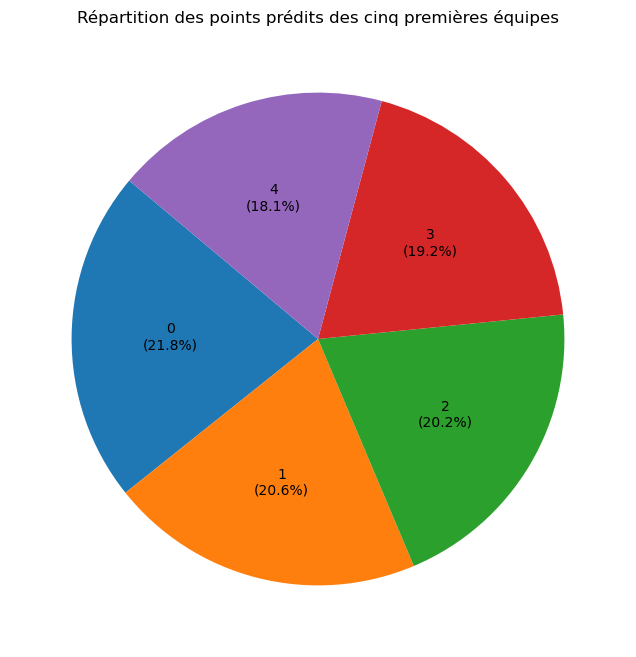

In [610]:


# Sélectionnez les cinq premières équipes ayant les points prédits les plus élevés
top_teams = predicted_points.nlargest(5)

# Créez un camembert pour visualiser la répartition des points prédits entre ces cinq équipes
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(top_teams, labels=[''] * len(top_teams), autopct='%1.1f%%', startangle=140)

# Ajoutez le nom de l'équipe comme annotation pour chaque tranche
for i, text in enumerate(autotexts):
    team_name = top_teams.index[i]
    text.set_text(f"{team_name}\n({text.get_text()})")

plt.title('Répartition des points prédits des cinq premières équipes')
plt.show()


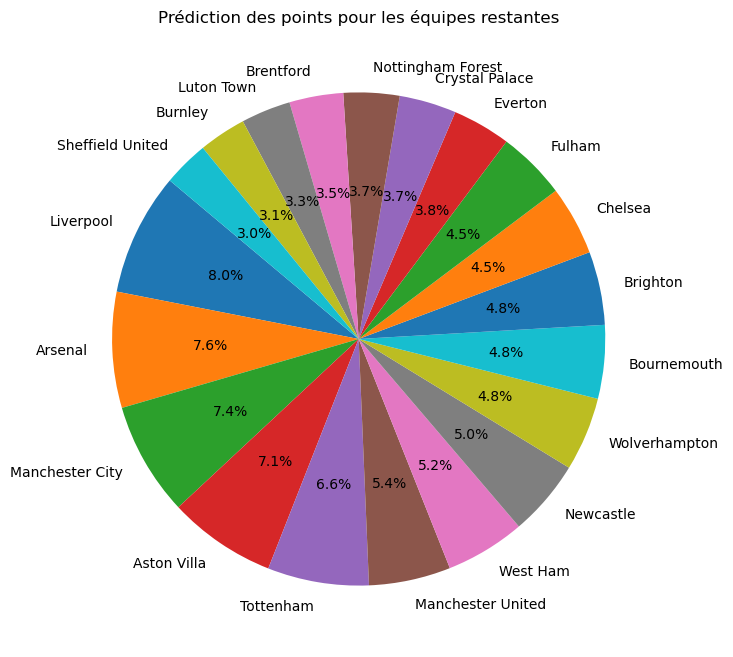

In [611]:
import matplotlib.pyplot as plt

top_teams = predicted_points.nlargest(5)
# Liste des noms des équipes avec leurs points prédits
teams = predicted_points_ranking['Team']
points = predicted_points_ranking['Predicted Points'].tolist()

# Création du camembert avec les noms des équipes comme étiquettes
plt.figure(figsize=(7, 8))
plt.pie(points, labels=teams, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Prédiction des points pour les équipes restantes')
plt.show()


In [612]:
# Convertir les points prédits en entiers
predicted_points_with_teams['Predicted Points'] = predicted_points_with_teams['Predicted Points'].astype(int)


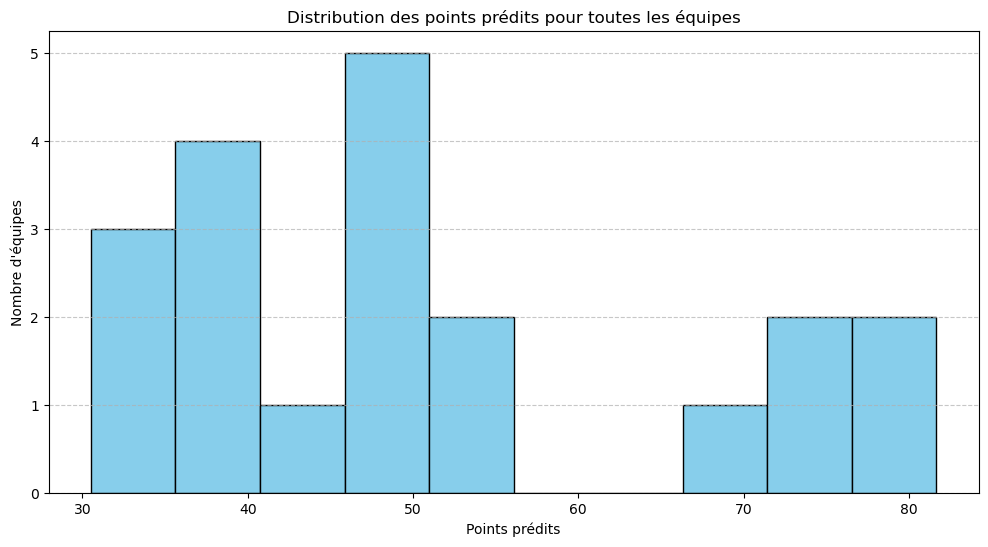

In [613]:
import matplotlib.pyplot as plt

# Créer un histogramme des points prédits pour toutes les équipes
plt.figure(figsize=(12, 6))
plt.hist(predicted_points_ranking['Predicted Points'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des points prédits pour toutes les équipes')
plt.xlabel('Points prédits')
plt.ylabel('Nombre d\'équipes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [614]:
#analyse